# Figure 1

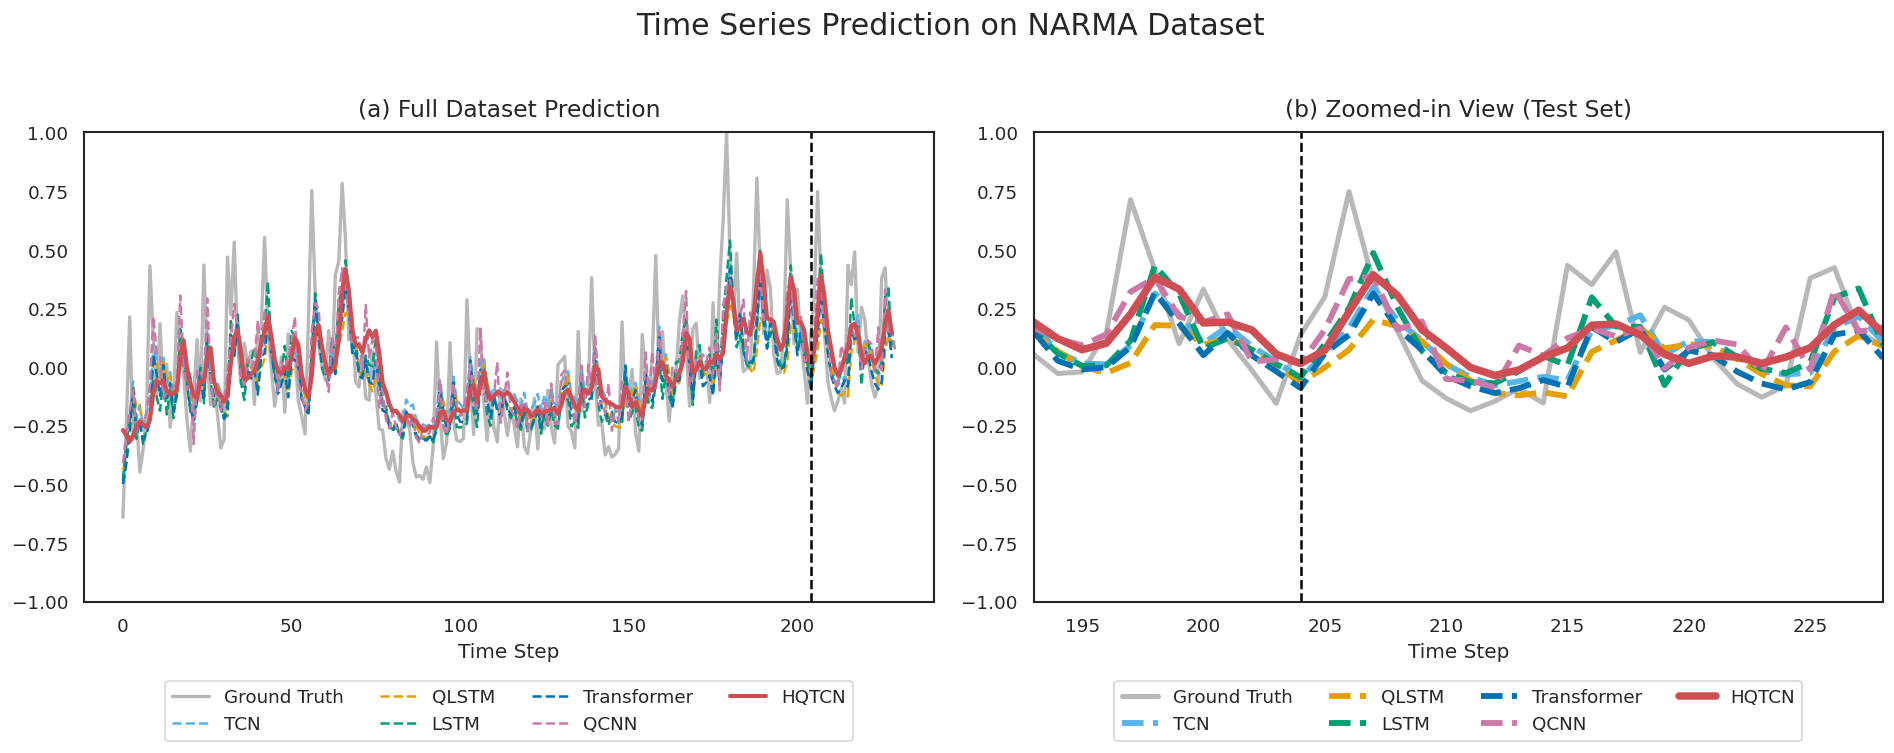

Figure saved successfully to: /pscratch/sd/p/pakmasha/QTCN/visualization/figure_1.svg


In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# --- 1. Configuration ---
CSV_FILE_PATH = '/pscratch/sd/p/pakmasha/QTCN/visualization/narma_predictions.csv'
SAVE_DIR = '/pscratch/sd/p/pakmasha/QTCN/visualization'
FIGURE_NAME = 'figure_1.svg'
SAVE_PATH = os.path.join(SAVE_DIR, FIGURE_NAME)

colors = {
    'ground_truth': '#B8B8B8', 
    'lstm': '#009E73',
    'qtcn2': '#CF4E53',
    'tcn': '#56B4E9',
    'qlstm': '#E69F00',
    'transformer': '#0072B2',
    'qcnn': '#CC79A7'
}

ZOOM_START = 193
ZOOM_END = 228

# --- 2. Data Loading ---
try:
    df = pd.read_csv(CSV_FILE_PATH, delimiter=';')
except FileNotFoundError:
    print(f"Error: The file '{CSV_FILE_PATH}' was not found.")
    exit()

# --- 3. Plotting ---
sns.set_theme(style="white")
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6), dpi=120)

fig.suptitle('Time Series Prediction on NARMA Dataset', fontsize=18, y=1.02)

# --- Panel (a): Full Dataset Prediction ---
ax1.plot(df.index, df['ground_truth'], label='Ground Truth', color=colors['ground_truth'], linewidth=2.0)
ax1.plot(df.index, df['tcn_pred'], label='TCN', color=colors['tcn'], linewidth=1.5, linestyle='--')
ax1.plot(df.index, df['qlstm_pred'], label='QLSTM', color=colors['qlstm'], linewidth=1.5, linestyle='--')
ax1.plot(df.index, df['lstm_pred'], label='LSTM', color=colors['lstm'], linewidth=1.5, linestyle='--')
ax1.plot(df.index, df['transformer_pred'], label='Transformer', color=colors['transformer'], linewidth=1.5, linestyle='--')
ax1.plot(df.index, df['qcnn_pred'], label='QCNN', color=colors['qcnn'], linewidth=1.5, linestyle='--')
ax1.plot(df.index, df['qtcn2_pred'], label='HQTCN', color=colors['qtcn2'], linewidth=2.5)
ax1.axvline(x=204, color='black', linestyle='--', linewidth=1.5)

ax1.set_title('(a) Full Dataset Prediction', fontsize=14, pad=10)
ax1.set_xlabel('Time Step', fontsize=12)
ax1.set_ylim(-1.0, 1.0)
# MODIFIED LEGEND: Placed horizontally at the bottom of the plot
ax1.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=4)

# --- Panel (b): Zoomed-in View ---
ax2.plot(df.index, df['ground_truth'], label='Ground Truth', color=colors['ground_truth'], linewidth=3.0)
ax2.plot(df.index, df['tcn_pred'], label='TCN', color=colors['tcn'], linewidth=3.5, linestyle='--')
ax2.plot(df.index, df['qlstm_pred'], label='QLSTM', color=colors['qlstm'], linewidth=3.5, linestyle='--')
ax2.plot(df.index, df['lstm_pred'], label='LSTM', color=colors['lstm'], linewidth=3.5, linestyle='--')
ax2.plot(df.index, df['transformer_pred'], label='Transformer', color=colors['transformer'], linewidth=3.5, linestyle='--')
ax2.plot(df.index, df['qcnn_pred'], label='QCNN', color=colors['qcnn'], linewidth=3.5, linestyle='--')
ax2.plot(df.index, df['qtcn2_pred'], label='HQTCN', color=colors['qtcn2'], linewidth=4.5)
ax2.axvline(x=204, color='black', linestyle='--', linewidth=1.5)

ax2.set_title('(b) Zoomed-in View (Test Set)', fontsize=14, pad=10)
ax2.set_xlabel('Time Step', fontsize=12)
ax2.set_xlim(ZOOM_START, ZOOM_END)
ax2.set_ylim(-1.0, 1.0)
# MODIFIED LEGEND: Placed horizontally at the bottom of the plot
ax2.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=4)

# --- 4. Final Touches and Saving ---
plt.tight_layout()
# Adjust layout to make room for legends
fig.subplots_adjust(bottom=0.2)

os.makedirs(SAVE_DIR, exist_ok=True)
plt.savefig(SAVE_PATH, bbox_inches='tight')
plt.show()

print(f"Figure saved successfully to: {SAVE_PATH}")

# Figure 2

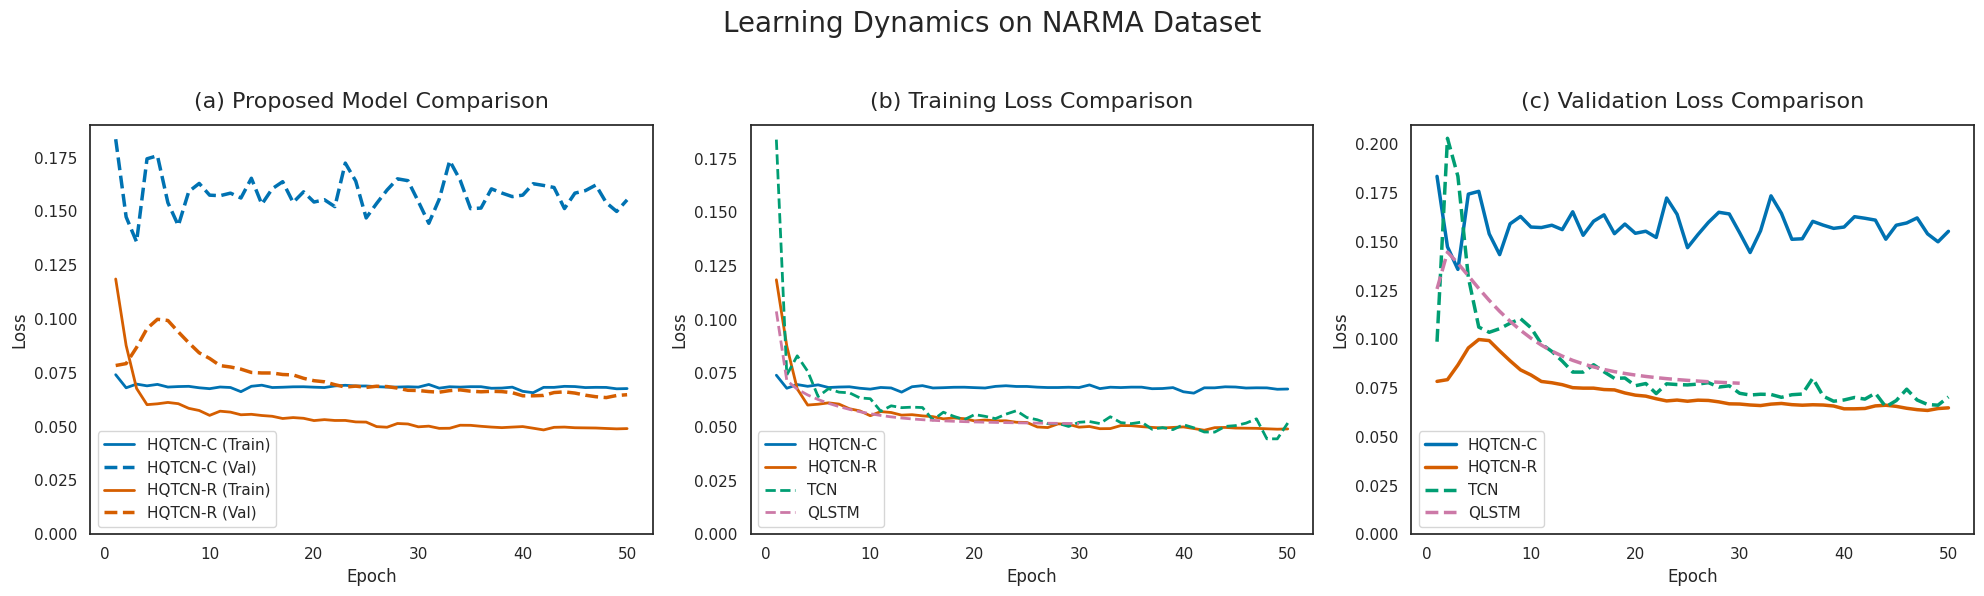

Figure saved successfully to: /pscratch/sd/p/pakmasha/QTCN/visualization/figure_2.svg


In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# --- 1. Configuration ---
CSV_FILE_PATH = '/pscratch/sd/p/pakmasha/QTCN/visualization/narma_logs.csv'
# Define the output path and filename
SAVE_DIR = '/pscratch/sd/p/pakmasha/QTCN/visualization'
FIGURE_NAME = 'figure_2.svg' # Using SVG for highest quality vector graphics
SAVE_PATH = os.path.join(SAVE_DIR, FIGURE_NAME)


# Define a professional color palette
colors = {
    'qtcn1': '#0072B2',  # Blue
    'qtcn2': '#D55E00',  # Vermillion
    'tcn': '#009E73',   # Green
    'qlstm': '#CC79A7', # Reddish Purple
}

# Define line styles
styles = {
    'train': '-',  # Solid
    'val': '--',   # Dashed
}

# --- 2. Data Loading ---
try:
    df = pd.read_csv(CSV_FILE_PATH)
except FileNotFoundError:
    print(f"Error: The file '{CSV_FILE_PATH}' was not found.")
    exit()

# --- 3. Plotting ---
sns.set_theme(style="white")
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))

# Use a slightly lower 'y' value to bring the title closer to the plots
fig.suptitle('Learning Dynamics on NARMA Dataset', fontsize=20, y=0.99)

# --- Panel A: Proposed Models (Train & Val Loss) ---
ax1.plot(df['epoch'], df['qtcn1_train_loss'], label='HQTCN-C (Train)', color=colors['qtcn1'], linestyle=styles['train'], linewidth=2)
ax1.plot(df['epoch'], df['qtcn1_val_loss'], label='HQTCN-C (Val)', color=colors['qtcn1'], linestyle=styles['val'], linewidth=2.5)
ax1.plot(df['epoch'], df['qtcn2_train_loss'], label='HQTCN-R (Train)', color=colors['qtcn2'], linestyle=styles['train'], linewidth=2)
ax1.plot(df['epoch'], df['qtcn2_val_loss'], label='HQTCN-R (Val)', color=colors['qtcn2'], linestyle=styles['val'], linewidth=2.5)

ax1.set_title('(a) Proposed Model Comparison', fontsize=16, pad=12)
ax1.set_xlabel('Epoch', fontsize=12)
ax1.set_ylabel('Loss', fontsize=12) # Changed Y-axis label
# ax1.grid(True, which='both', linestyle='--', linewidth=0.5)
ax1.legend(loc='lower left') # Fixed legend to bottom left
ax1.set_ylim(bottom=0)

# --- Panel B: All Models (Training Loss) ---
ax2.plot(df['epoch'], df['qtcn1_train_loss'], label='HQTCN-C', color=colors['qtcn1'], linestyle=styles['train'], linewidth=2)
ax2.plot(df['epoch'], df['qtcn2_train_loss'], label='HQTCN-R', color=colors['qtcn2'], linestyle=styles['train'], linewidth=2)
ax2.plot(df['epoch'], df['tcn_train_loss'], label='TCN', color=colors['tcn'], linestyle=styles['val'], linewidth=2)
ax2.plot(df['epoch'], df['qlstm_train_loss'], label='QLSTM', color=colors['qlstm'], linestyle=styles['val'], linewidth=2)

ax2.set_title('(b) Training Loss Comparison', fontsize=16, pad=12)
ax2.set_xlabel('Epoch', fontsize=12)
ax2.set_ylabel('Loss', fontsize=12) # Changed Y-axis label
# ax2.grid(True, which='both', linestyle='--', linewidth=0.5)
ax2.legend(loc='lower left') # Fixed legend to bottom left
ax2.set_ylim(bottom=0)

# --- Panel C: All Models (Validation Loss) ---
ax3.plot(df['epoch'], df['qtcn1_val_loss'], label='HQTCN-C', color=colors['qtcn1'], linestyle=styles['train'], linewidth=2.5)
ax3.plot(df['epoch'], df['qtcn2_val_loss'], label='HQTCN-R', color=colors['qtcn2'], linestyle=styles['train'], linewidth=2.5)
ax3.plot(df['epoch'], df['tcn_val_loss'], label='TCN', color=colors['tcn'], linestyle=styles['val'], linewidth=2.5)
ax3.plot(df['epoch'], df['qlstm_val_loss'], label='QLSTM', color=colors['qlstm'], linestyle=styles['val'], linewidth=2.5)

ax3.set_title('(c) Validation Loss Comparison', fontsize=16, pad=12)
ax3.set_xlabel('Epoch', fontsize=12)
ax3.set_ylabel('Loss', fontsize=12) # Changed Y-axis label
# ax3.grid(True, which='both', linestyle='--', linewidth=0.5)
ax3.legend(loc='lower left') # Fixed legend to bottom left
ax3.set_ylim(bottom=0)

# --- 4. Final Touches and Saving ---
plt.tight_layout(rect=[0, 0, 1, 0.96]) # Adjust layout to prevent title overlap

# Ensure the save directory exists
os.makedirs(SAVE_DIR, exist_ok=True)

# Save the figure in high quality
# Using SVG format for best quality (vector graphics)
# Use bbox_inches='tight' to prevent labels from being cut off
plt.savefig(SAVE_PATH, bbox_inches='tight')

plt.show() # You can still display the plot in the notebook after saving

print(f"Figure saved successfully to: {SAVE_PATH}")

# Figure 3

### (sampling frequency = 80)

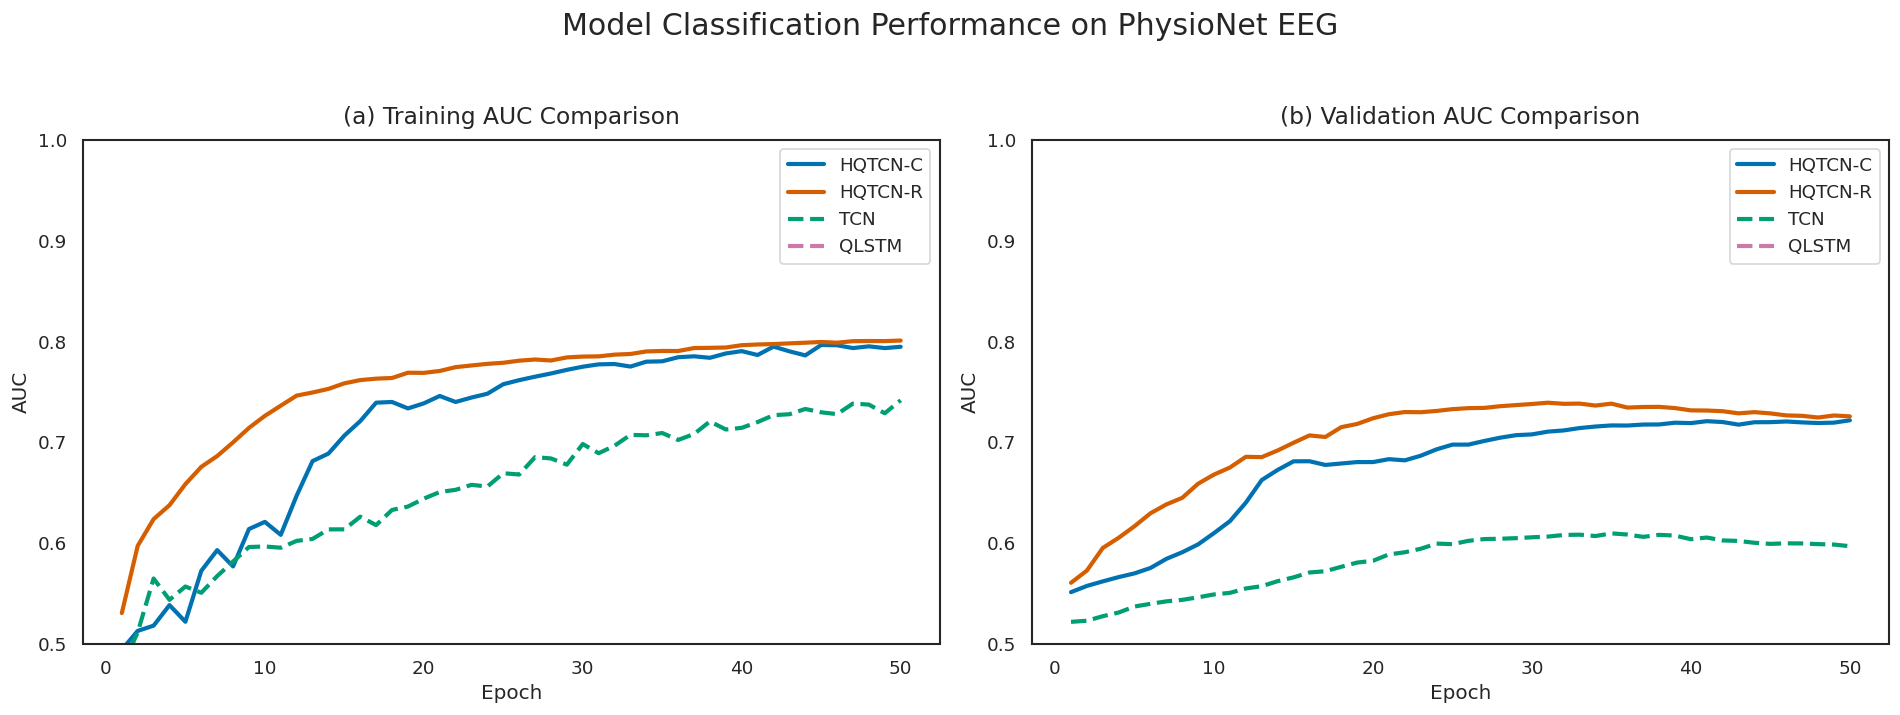

Figure saved successfully to: /pscratch/sd/p/pakmasha/QTCN/visualization/figure_3.svg


In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# --- 1. Configuration ---
CSV_FILE_PATH = '/pscratch/sd/p/pakmasha/QTCN/visualization/physionet_logs.csv'
# Define the output path and filename
SAVE_DIR = '/pscratch/sd/p/pakmasha/QTCN/visualization'
FIGURE_NAME = 'figure_3.svg' # Using SVG for highest quality
SAVE_PATH = os.path.join(SAVE_DIR, FIGURE_NAME)

# Define the same color palette as previous figures
colors = {
    'qtcn1': '#0072B2',      # Blue
    'qtcn2': '#D55E00',      # Vermillion
    'tcn': '#009E73',       # Green
    'qlstm': '#CC79A7',     # Reddish Purple
}

# --- 2. Data Loading ---
try:
    df = pd.read_csv(CSV_FILE_PATH)
except FileNotFoundError:
    print(f"Error: The file '{CSV_FILE_PATH}' was not found.")
    print("Please make sure the CSV file is in the correct location.")
    exit()

# --- 3. Plotting ---
sns.set_theme(style="white")
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6), dpi=120)

# Set the main title for the figure
fig.suptitle('Model Classification Performance on PhysioNet EEG', fontsize=18, y=0.99)

# --- Panel (a): Training AUC Comparison ---
ax1.plot(df['epoch'], df['qtcn1_train_auc'], label='HQTCN-C', color=colors['qtcn1'], linewidth=2.5)
ax1.plot(df['epoch'], df['qtcn2_train_auc'], label='HQTCN-R', color=colors['qtcn2'], linewidth=2.5)
ax1.plot(df['epoch'], df['tcn_train_auc'], label='TCN', color=colors['tcn'], linewidth=2.5, linestyle='--')
ax1.plot(df['epoch'], df['qlstm_train_auc'], label='QLSTM', color=colors['qlstm'], linewidth=2.5, linestyle='--')

ax1.set_title('(a) Training AUC Comparison', fontsize=14, pad=10)
ax1.set_xlabel('Epoch', fontsize=12)
ax1.set_ylabel('AUC', fontsize=12)
ax1.legend()
ax1.set_ylim(0.5, 1.0) # AUC ranges from 0 to 1, 0.5 is random chance

# --- Panel (b): Validation AUC Comparison ---
ax2.plot(df['epoch'], df['qtcn1_val_auc'], label='HQTCN-C', color=colors['qtcn1'], linewidth=2.5)
ax2.plot(df['epoch'], df['qtcn2_val_auc'], label='HQTCN-R', color=colors['qtcn2'], linewidth=2.5)
ax2.plot(df['epoch'], df['tcn_val_auc'], label='TCN', color=colors['tcn'], linewidth=2.5, linestyle='--')
ax2.plot(df['epoch'], df['qlstm_val_auc'], label='QLSTM', color=colors['qlstm'], linewidth=2.5, linestyle='--')

ax2.set_title('(b) Validation AUC Comparison', fontsize=14, pad=10)
ax2.set_xlabel('Epoch', fontsize=12)
ax2.set_ylabel('AUC', fontsize=12)
ax2.legend()
ax2.set_ylim(0.5, 1.0) # AUC ranges from 0 to 1, 0.5 is random chance

# --- 4. Final Touches and Saving ---
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Ensure the save directory exists
os.makedirs(SAVE_DIR, exist_ok=True)

# Save the figure in high quality
plt.savefig(SAVE_PATH, bbox_inches='tight')

plt.show()

print(f"Figure saved successfully to: {SAVE_PATH}")

### (sampling frequency = 4)

/tmp/ipykernel_373655/3776911990.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


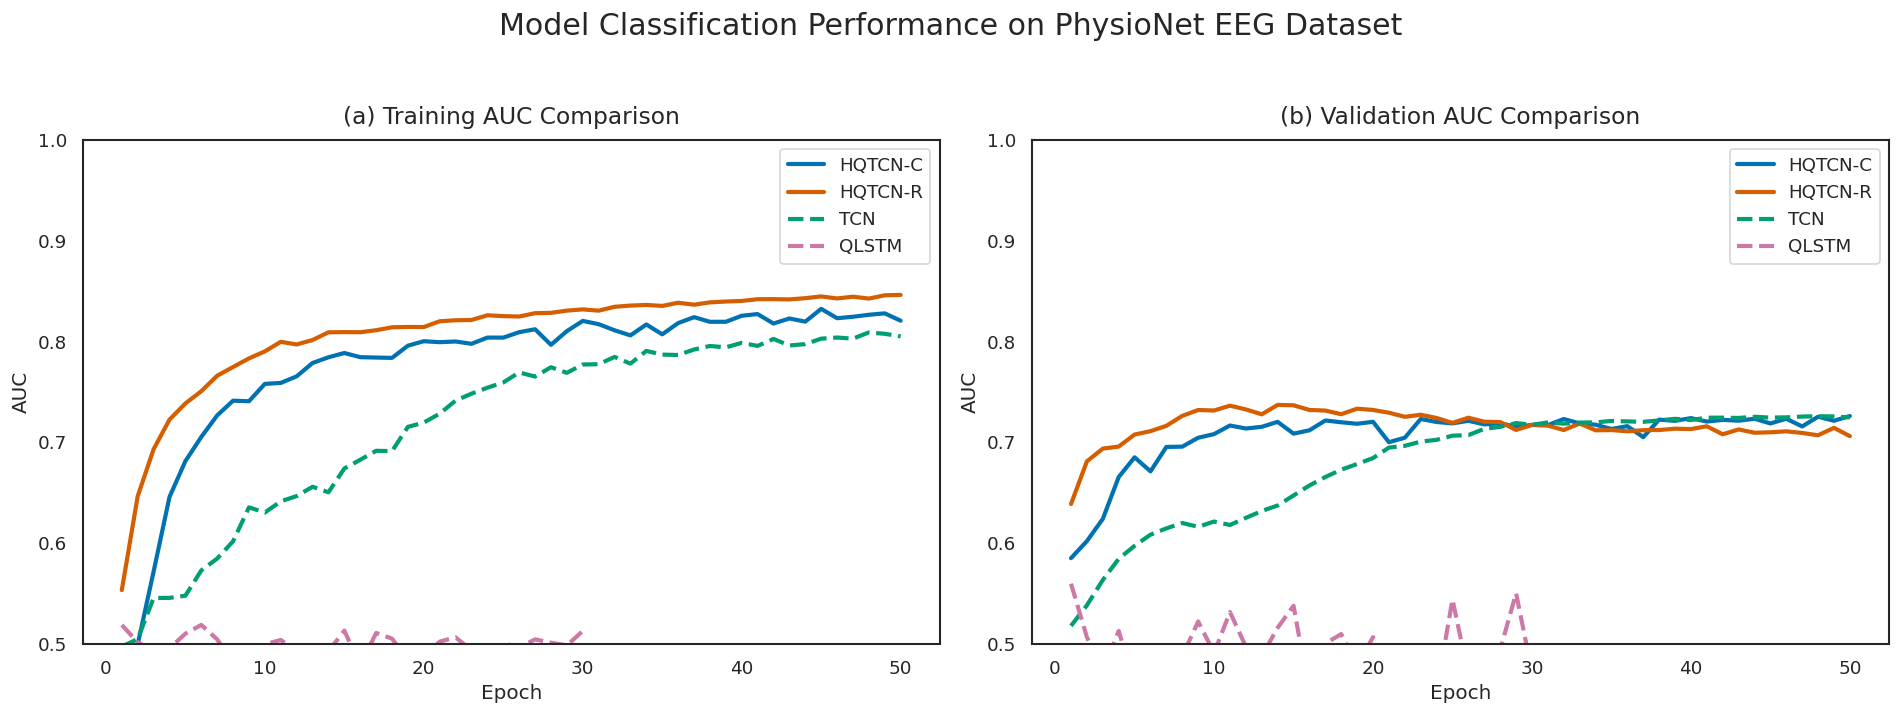

Figure saved successfully to: /pscratch/sd/p/pakmasha/QTCN/visualization/figure_3_samfreq=4.svg


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# --- 1. Configuration ---
CSV_FILE_PATH = '/pscratch/sd/p/pakmasha/QTCN/visualization/physionet_logs_samfreq=4.csv'
# Define the output path and filename
SAVE_DIR = '/pscratch/sd/p/pakmasha/QTCN/visualization'
FIGURE_NAME = 'figure_3_samfreq=4.svg' # Using SVG for highest quality
SAVE_PATH = os.path.join(SAVE_DIR, FIGURE_NAME)

# Define the same color palette as previous figures
colors = {
    'qtcn1': '#0072B2',      # Blue
    'qtcn2': '#D55E00',      # Vermillion
    'tcn': '#009E73',       # Green
    'qlstm': '#CC79A7',     # Reddish Purple
}

# --- 2. Data Loading ---
try:
    df = pd.read_csv(CSV_FILE_PATH)
except FileNotFoundError:
    print(f"Error: The file '{CSV_FILE_PATH}' was not found.")
    print("Please make sure the CSV file is in the correct location.")
    exit()

# --- 3. Plotting ---
sns.set_theme(style="white")
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6), dpi=120)

# Set the main title for the figure
fig.suptitle('Model Classification Performance on PhysioNet EEG Dataset', fontsize=18, y=0.99)

# --- Panel (a): Training AUC Comparison ---
ax1.plot(df['epoch'], df['qtcn1_train_auc'], label='HQTCN-C', color=colors['qtcn1'], linewidth=2.5)
ax1.plot(df['epoch'], df['qtcn2_train_auc'], label='HQTCN-R', color=colors['qtcn2'], linewidth=2.5)
ax1.plot(df['epoch'], df['tcn_train_auc'], label='TCN', color=colors['tcn'], linewidth=2.5, linestyle='--')
ax1.plot(df['epoch'], df['qlstm_train_auc'], label='QLSTM', color=colors['qlstm'], linewidth=2.5, linestyle='--')

ax1.set_title('(a) Training AUC Comparison', fontsize=14, pad=10)
ax1.set_xlabel('Epoch', fontsize=12)
ax1.set_ylabel('AUC', fontsize=12)
ax1.legend()
ax1.set_ylim(0.5, 1.0) # AUC ranges from 0 to 1, 0.5 is random chance

# --- Panel (b): Validation AUC Comparison ---
ax2.plot(df['epoch'], df['qtcn1_val_auc'], label='HQTCN-C', color=colors['qtcn1'], linewidth=2.5)
ax2.plot(df['epoch'], df['qtcn2_val_auc'], label='HQTCN-R', color=colors['qtcn2'], linewidth=2.5)
ax2.plot(df['epoch'], df['tcn_val_auc'], label='TCN', color=colors['tcn'], linewidth=2.5, linestyle='--')
ax2.plot(df['epoch'], df['qlstm_val_auc'], label='QLSTM', color=colors['qlstm'], linewidth=2.5, linestyle='--')

ax2.set_title('(b) Validation AUC Comparison', fontsize=14, pad=10)
ax2.set_xlabel('Epoch', fontsize=12)
ax2.set_ylabel('AUC', fontsize=12)
ax2.legend()
ax2.set_ylim(0.5, 1.0) # AUC ranges from 0 to 1, 0.5 is random chance

# --- 4. Final Touches and Saving ---
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Ensure the save directory exists
os.makedirs(SAVE_DIR, exist_ok=True)

# Save the figure in high quality
plt.savefig(SAVE_PATH, bbox_inches='tight')

plt.show()

print(f"Figure saved successfully to: {SAVE_PATH}")

# Figure 4

### (sampling frequency = 80)

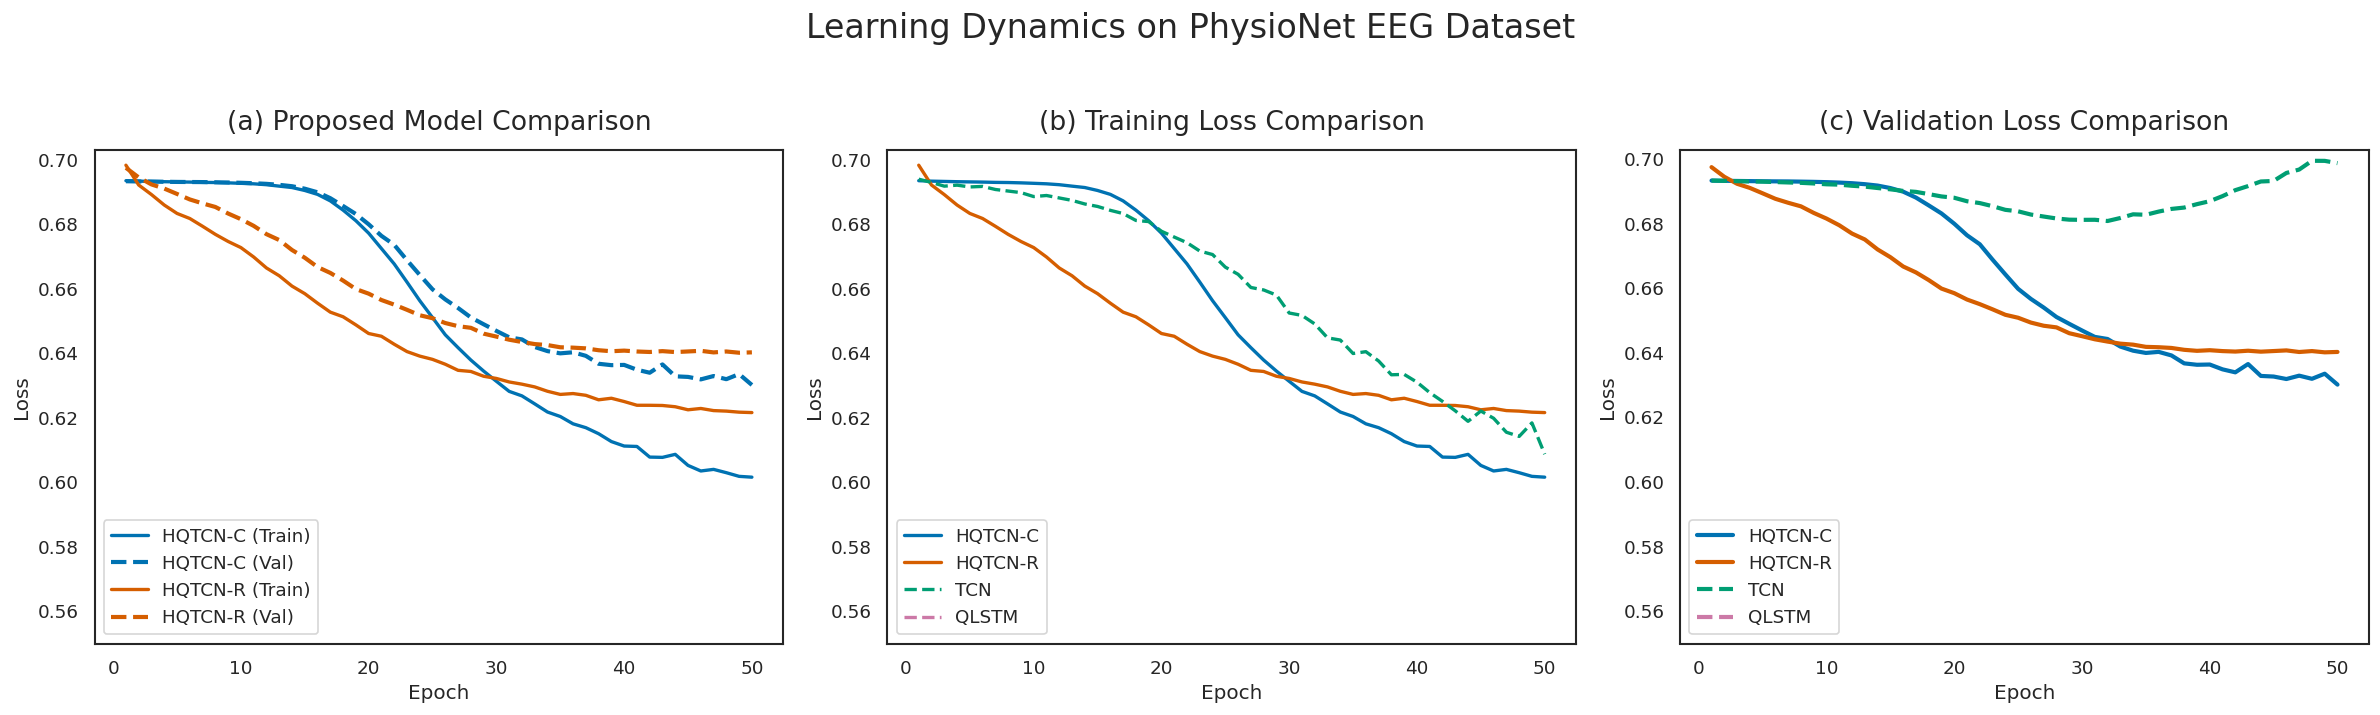

Figure saved successfully to: /pscratch/sd/p/pakmasha/QTCN/visualization/figure_4.svg


In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# --- 1. Configuration ---
CSV_FILE_PATH = '/pscratch/sd/p/pakmasha/QTCN/visualization/physionet_logs.csv'
# Define the output path and filename
SAVE_DIR = '/pscratch/sd/p/pakmasha/QTCN/visualization'
FIGURE_NAME = 'figure_4.svg' # Using SVG for highest quality
SAVE_PATH = os.path.join(SAVE_DIR, FIGURE_NAME)

# Define a professional color palette for consistency
colors = {
    'qtcn1': '#0072B2',  # Blue
    'qtcn2': '#D55E00',  # Vermillion
    'tcn': '#009E73',   # Green
    'qlstm': '#CC79A7', # Reddish Purple
}

# Define line styles for training and validation loss
styles = {
    'train': '-',  # Solid line
    'val': '--',   # Dashed line
}

# --- 2. Data Loading ---
try:
    df = pd.read_csv(CSV_FILE_PATH)
except FileNotFoundError:
    print(f"Error: The file '{CSV_FILE_PATH}' was not found.")
    print("Please double-check the path and ensure the file exists.")
    exit()

# --- 3. Plotting ---
sns.set_theme(style="white")
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6), dpi=120)

# Set the main title for the figure
fig.suptitle('Learning Dynamics on PhysioNet EEG Dataset', fontsize=20, y=0.99)

# --- Panel A: Proposed Models (Train & Val Loss) ---
ax1.plot(df['epoch'], df['qtcn1_train_loss'], label='HQTCN-C (Train)', color=colors['qtcn1'], linestyle=styles['train'], linewidth=2)
ax1.plot(df['epoch'], df['qtcn1_val_loss'], label='HQTCN-C (Val)', color=colors['qtcn1'], linestyle=styles['val'], linewidth=2.5)
ax1.plot(df['epoch'], df['qtcn2_train_loss'], label='HQTCN-R (Train)', color=colors['qtcn2'], linestyle=styles['train'], linewidth=2)
ax1.plot(df['epoch'], df['qtcn2_val_loss'], label='HQTCN-R (Val)', color=colors['qtcn2'], linestyle=styles['val'], linewidth=2.5)

ax1.set_title('(a) Proposed Model Comparison', fontsize=16, pad=12)
ax1.set_xlabel('Epoch', fontsize=12)
ax1.set_ylabel('Loss', fontsize=12)
# ax1.grid(True, which='both', linestyle='--', linewidth=0.5)
ax1.legend(loc='lower left')
ax1.set_ylim(bottom=0.55)

# --- Panel B: All Models (Training Loss) ---
ax2.plot(df['epoch'], df['qtcn1_train_loss'], label='HQTCN-C', color=colors['qtcn1'], linestyle=styles['train'], linewidth=2)
ax2.plot(df['epoch'], df['qtcn2_train_loss'], label='HQTCN-R', color=colors['qtcn2'], linestyle=styles['train'], linewidth=2)
ax2.plot(df['epoch'], df['tcn_train_loss'], label='TCN', color=colors['tcn'], linestyle=styles['val'], linewidth=2)
ax2.plot(df['epoch'], df['qlstm_train_loss'], label='QLSTM', color=colors['qlstm'], linestyle=styles['val'], linewidth=2)

ax2.set_title('(b) Training Loss Comparison', fontsize=16, pad=12)
ax2.set_xlabel('Epoch', fontsize=12)
ax2.set_ylabel('Loss', fontsize=12)
# ax2.grid(True, which='both', linestyle='--', linewidth=0.5)
ax2.legend(loc='lower left')
ax2.set_ylim(bottom=0.55)

# --- Panel C: All Models (Validation Loss) ---
ax3.plot(df['epoch'], df['qtcn1_val_loss'], label='HQTCN-C', color=colors['qtcn1'], linestyle=styles['train'], linewidth=2.5)
ax3.plot(df['epoch'], df['qtcn2_val_loss'], label='HQTCN-R', color=colors['qtcn2'], linestyle=styles['train'], linewidth=2.5)
ax3.plot(df['epoch'], df['tcn_val_loss'], label='TCN', color=colors['tcn'], linestyle=styles['val'], linewidth=2.5)
ax3.plot(df['epoch'], df['qlstm_val_loss'], label='QLSTM', color=colors['qlstm'], linestyle=styles['val'], linewidth=2.5)

ax3.set_title('(c) Validation Loss Comparison', fontsize=16, pad=12)
ax3.set_xlabel('Epoch', fontsize=12)
ax3.set_ylabel('Loss', fontsize=12)
# ax3.grid(True, which='both', linestyle='--', linewidth=0.5)
ax3.legend(loc='lower left')
ax3.set_ylim(bottom=0.55)

# --- 4. Final Touches and Saving ---
plt.tight_layout(rect=[0, 0, 1, 0.96]) # Adjust layout to prevent title overlap

# Ensure the save directory exists
os.makedirs(SAVE_DIR, exist_ok=True)

# Save the figure in high quality
plt.savefig(SAVE_PATH, bbox_inches='tight')

plt.show()

print(f"Figure saved successfully to: {SAVE_PATH}")

### (sampling frequency = 4)

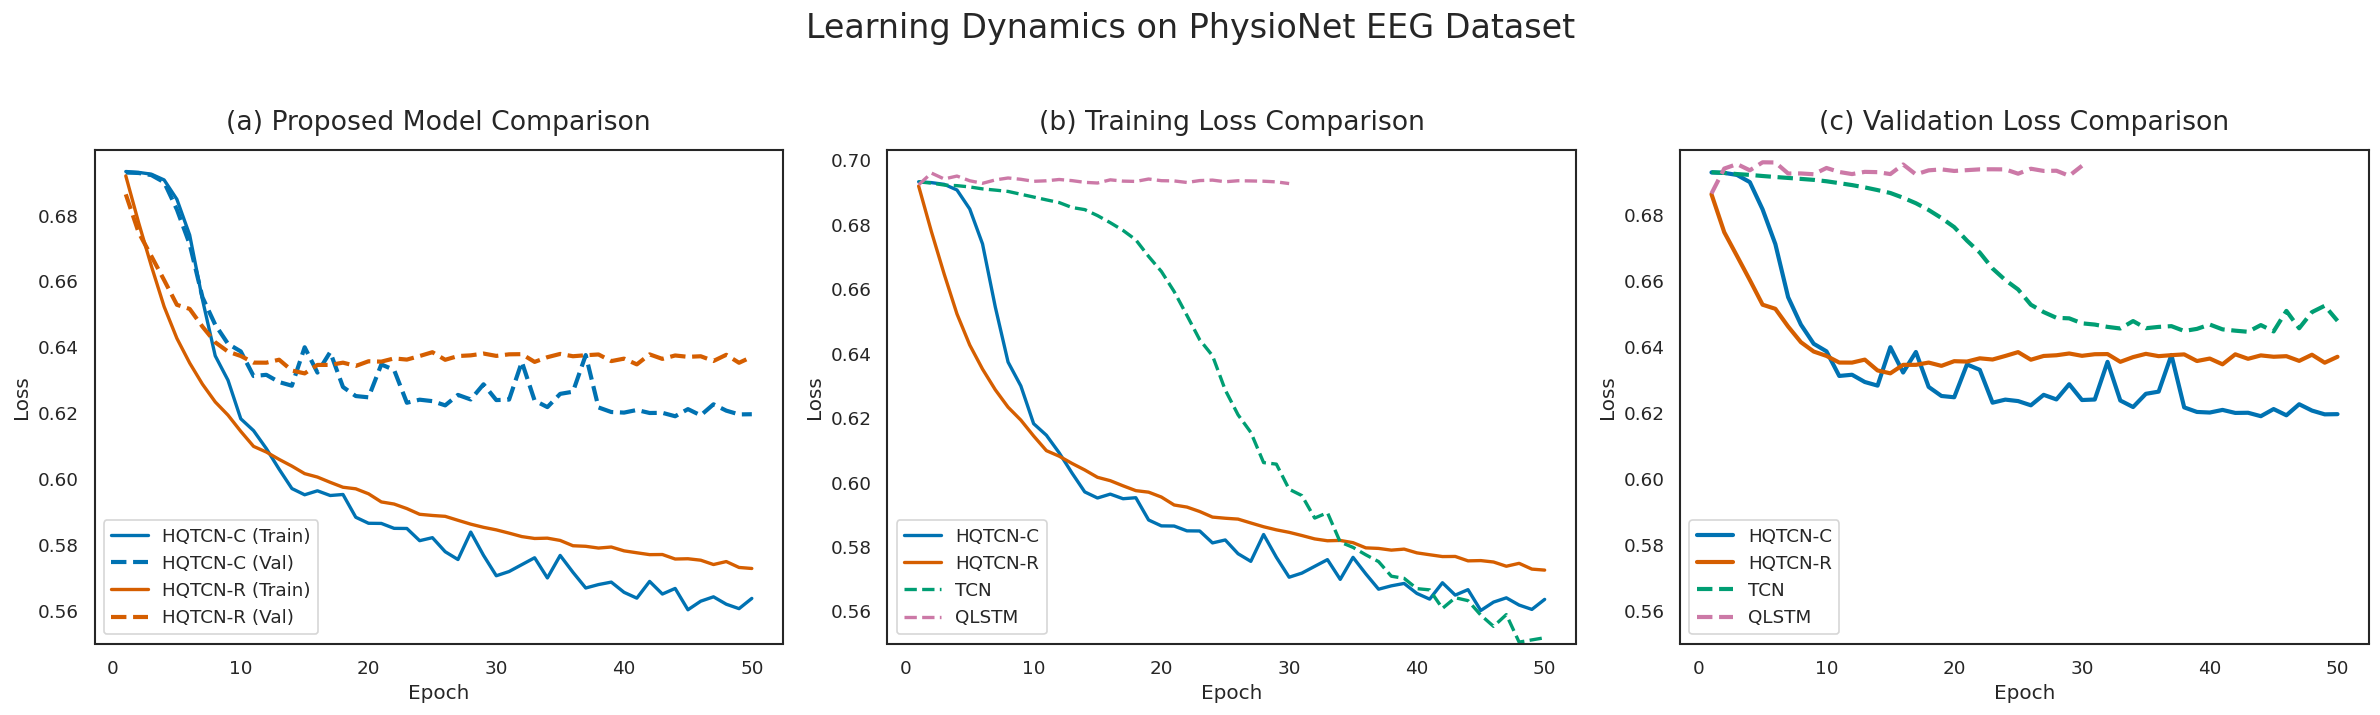

Figure saved successfully to: /pscratch/sd/p/pakmasha/QTCN/visualization/figure_4_samfreq=4.svg


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# --- 1. Configuration ---
CSV_FILE_PATH = '/pscratch/sd/p/pakmasha/QTCN/visualization/physionet_logs_samfreq=4.csv'
# Define the output path and filename
SAVE_DIR = '/pscratch/sd/p/pakmasha/QTCN/visualization'
FIGURE_NAME = 'figure_4_samfreq=4.svg' # Using SVG for highest quality
SAVE_PATH = os.path.join(SAVE_DIR, FIGURE_NAME)

# Define a professional color palette for consistency
colors = {
    'qtcn1': '#0072B2',  # Blue
    'qtcn2': '#D55E00',  # Vermillion
    'tcn': '#009E73',   # Green
    'qlstm': '#CC79A7', # Reddish Purple
}

# Define line styles for training and validation loss
styles = {
    'train': '-',  # Solid line
    'val': '--',   # Dashed line
}

# --- 2. Data Loading ---
try:
    df = pd.read_csv(CSV_FILE_PATH)
except FileNotFoundError:
    print(f"Error: The file '{CSV_FILE_PATH}' was not found.")
    print("Please double-check the path and ensure the file exists.")
    exit()

# --- 3. Plotting ---
sns.set_theme(style="white")
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6), dpi=120)

# Set the main title for the figure
fig.suptitle('Learning Dynamics on PhysioNet EEG Dataset', fontsize=20, y=0.99)

# --- Panel A: Proposed Models (Train & Val Loss) ---
ax1.plot(df['epoch'], df['qtcn1_train_loss'], label='HQTCN-C (Train)', color=colors['qtcn1'], linestyle=styles['train'], linewidth=2)
ax1.plot(df['epoch'], df['qtcn1_val_loss'], label='HQTCN-C (Val)', color=colors['qtcn1'], linestyle=styles['val'], linewidth=2.5)
ax1.plot(df['epoch'], df['qtcn2_train_loss'], label='HQTCN-R (Train)', color=colors['qtcn2'], linestyle=styles['train'], linewidth=2)
ax1.plot(df['epoch'], df['qtcn2_val_loss'], label='HQTCN-R (Val)', color=colors['qtcn2'], linestyle=styles['val'], linewidth=2.5)

ax1.set_title('(a) Proposed Model Comparison', fontsize=16, pad=12)
ax1.set_xlabel('Epoch', fontsize=12)
ax1.set_ylabel('Loss', fontsize=12)
# ax1.grid(True, which='both', linestyle='--', linewidth=0.5)
ax1.legend(loc='lower left')
ax1.set_ylim(bottom=0.55)

# --- Panel B: All Models (Training Loss) ---
ax2.plot(df['epoch'], df['qtcn1_train_loss'], label='HQTCN-C', color=colors['qtcn1'], linestyle=styles['train'], linewidth=2)
ax2.plot(df['epoch'], df['qtcn2_train_loss'], label='HQTCN-R', color=colors['qtcn2'], linestyle=styles['train'], linewidth=2)
ax2.plot(df['epoch'], df['tcn_train_loss'], label='TCN', color=colors['tcn'], linestyle=styles['val'], linewidth=2)
ax2.plot(df['epoch'], df['qlstm_train_loss'], label='QLSTM', color=colors['qlstm'], linestyle=styles['val'], linewidth=2)

ax2.set_title('(b) Training Loss Comparison', fontsize=16, pad=12)
ax2.set_xlabel('Epoch', fontsize=12)
ax2.set_ylabel('Loss', fontsize=12)
# ax2.grid(True, which='both', linestyle='--', linewidth=0.5)
ax2.legend(loc='lower left')
ax2.set_ylim(bottom=0.55)

# --- Panel C: All Models (Validation Loss) ---
ax3.plot(df['epoch'], df['qtcn1_val_loss'], label='HQTCN-C', color=colors['qtcn1'], linestyle=styles['train'], linewidth=2.5)
ax3.plot(df['epoch'], df['qtcn2_val_loss'], label='HQTCN-R', color=colors['qtcn2'], linestyle=styles['train'], linewidth=2.5)
ax3.plot(df['epoch'], df['tcn_val_loss'], label='TCN', color=colors['tcn'], linestyle=styles['val'], linewidth=2.5)
ax3.plot(df['epoch'], df['qlstm_val_loss'], label='QLSTM', color=colors['qlstm'], linestyle=styles['val'], linewidth=2.5)

ax3.set_title('(c) Validation Loss Comparison', fontsize=16, pad=12)
ax3.set_xlabel('Epoch', fontsize=12)
ax3.set_ylabel('Loss', fontsize=12)
# ax3.grid(True, which='both', linestyle='--', linewidth=0.5)
ax3.legend(loc='lower left')
ax3.set_ylim(bottom=0.55)

# --- 4. Final Touches and Saving ---
plt.tight_layout(rect=[0, 0, 1, 0.96]) # Adjust layout to prevent title overlap

# Ensure the save directory exists
os.makedirs(SAVE_DIR, exist_ok=True)

# Save the figure in high quality
plt.savefig(SAVE_PATH, bbox_inches='tight')

plt.show()

print(f"Figure saved successfully to: {SAVE_PATH}")

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# --- Configuration ---
# Set the full path to your CSV file
file_path = '/pscratch/sd/p/pakmasha/QTCN/visualization/hqtcn2_narma_timeseries_2026.csv'

# --- Load and Plot Data ---
try:
    # Read the CSV file into a pandas DataFrame
    df = pd.read_csv(file_path)

    # Check if the 'ground_truth' column exists
    if 'ground_truth' in df.columns:
        # Create the plot
        plt.figure(figsize=(14, 7)) # Set the figure size for better readability
        
        # Plot the 'ground_truth' column. The index of the DataFrame is used as the x-axis (time steps).
        plt.plot(df.index, df['ground_truth'], label='Ground Truth', color='blue', linewidth=2)
        
        # --- Customize the Plot ---
        plt.title('Ground Truth Time Series Data', fontsize=16)
        plt.xlabel('Time Step', fontsize=12)
        plt.ylabel('Value', fontsize=12)
        plt.grid(True, which='both', linestyle='--', linewidth=0.5)
        plt.legend(fontsize=12)
        
        # Improve the layout to prevent labels from overlapping
        plt.tight_layout()
        
        # Display the plot
        plt.show()
        
    else:
        print(f"Error: The column 'ground_truth' was not found in the CSV file.")
        print(f"Available columns are: {df.columns.tolist()}")

except FileNotFoundError:
    print(f"Error: The file was not found at the specified path: {file_path}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

